In [78]:
import pickle
import pandas as pd
import shap
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.dpi'] = 200

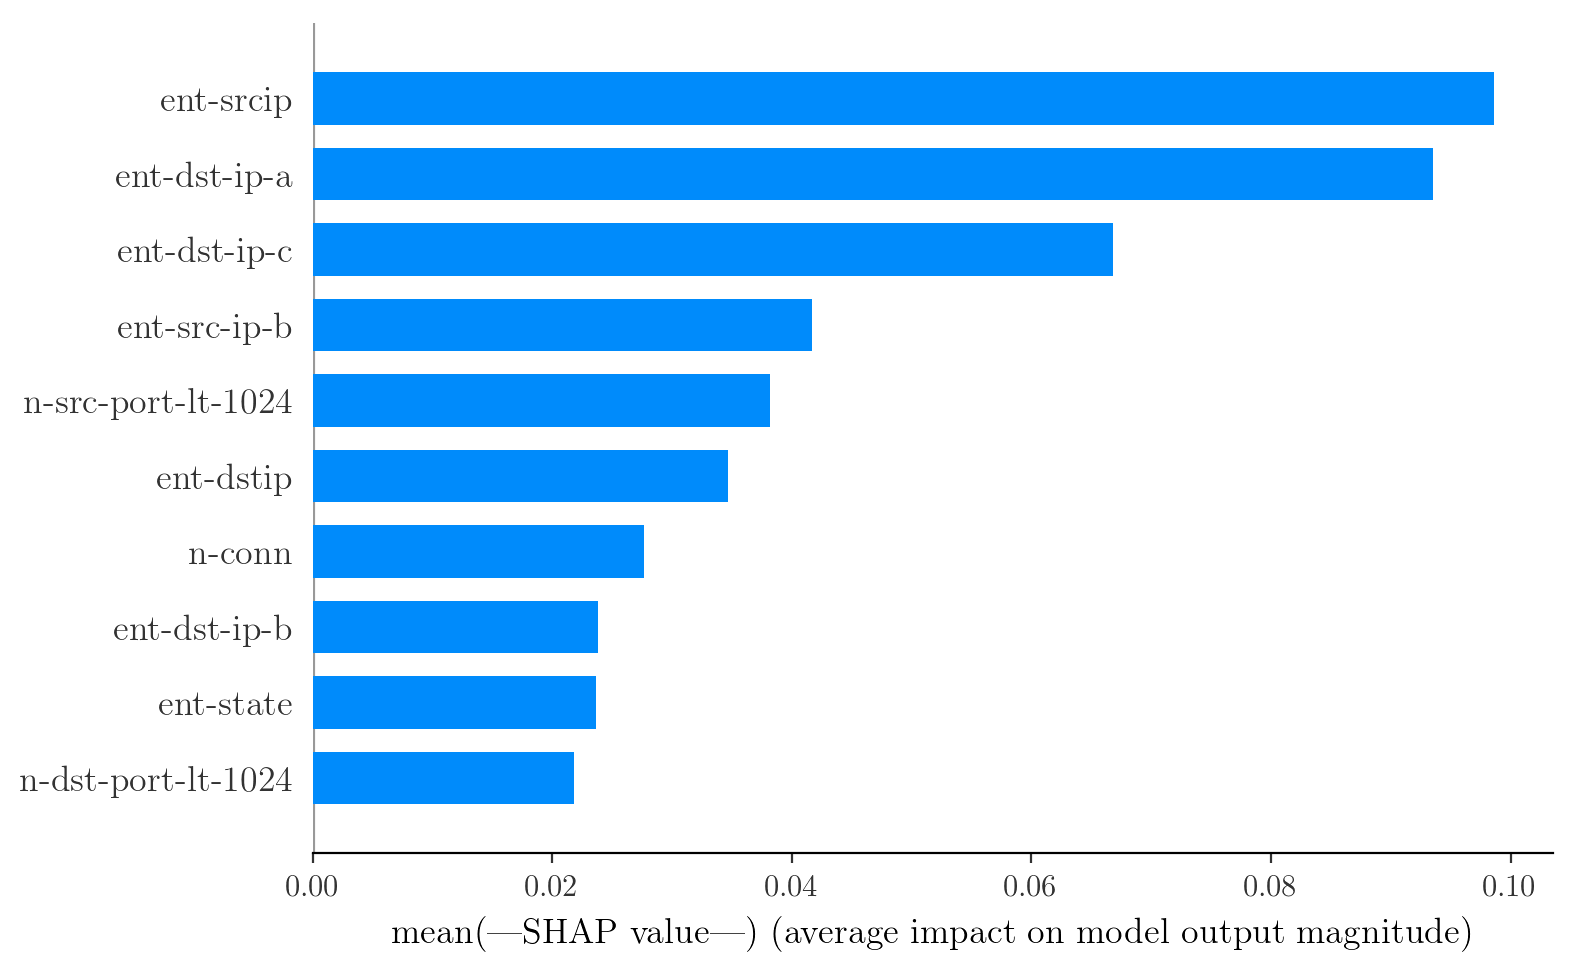

In [104]:
model = pickle.load(
    open(
        "../no_background_output/ddos_1s/netflow_random_forest_fast_0steps_binary/model.pickle",
        "rb",
    )
)
x_te = pd.read_parquet(
    "../no_background_output/ddos_1s/netflow_random_forest_fast_0steps_binary/x_te.parquet"
).rename(lambda x: x.replace('_', '-').replace('>=', '-gte-').replace('<', '-lt-').replace('s-','ent-'), axis=1)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_te)
shap.summary_plot(shap_values[0], x_te, plot_type="bar", max_display=10)

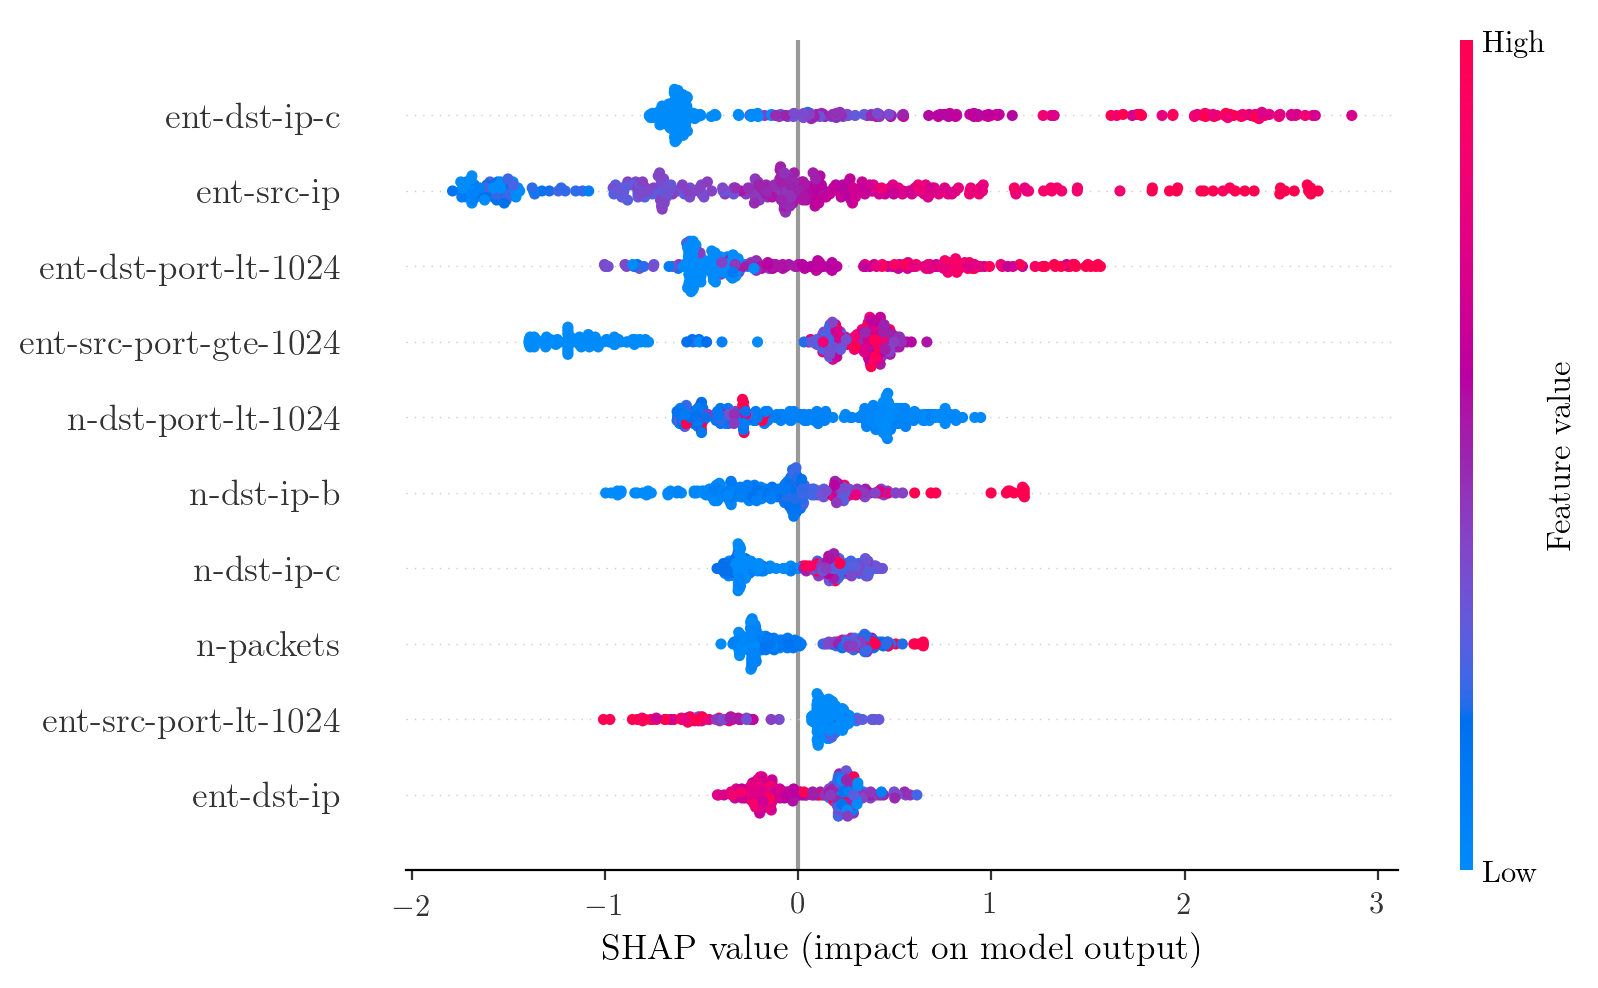

In [106]:
model = pickle.load(
    open(
        "../no_background_output/irc_1s/pcap_xgboost_fast_0steps_binary/model.pickle",
        "rb",
    )
)
x_te = pd.read_parquet(
    "../no_background_output/irc_1s/pcap_xgboost_fast_0steps_binary/x_te.parquet"
).rename(lambda x: x.replace('_', '-').replace('>=', '-gte-').replace('<', '-lt-').replace('ipclass', 'ip'), axis=1)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_te)
shap.summary_plot(shap_values, x_te, plot_type="dot", max_display=10)

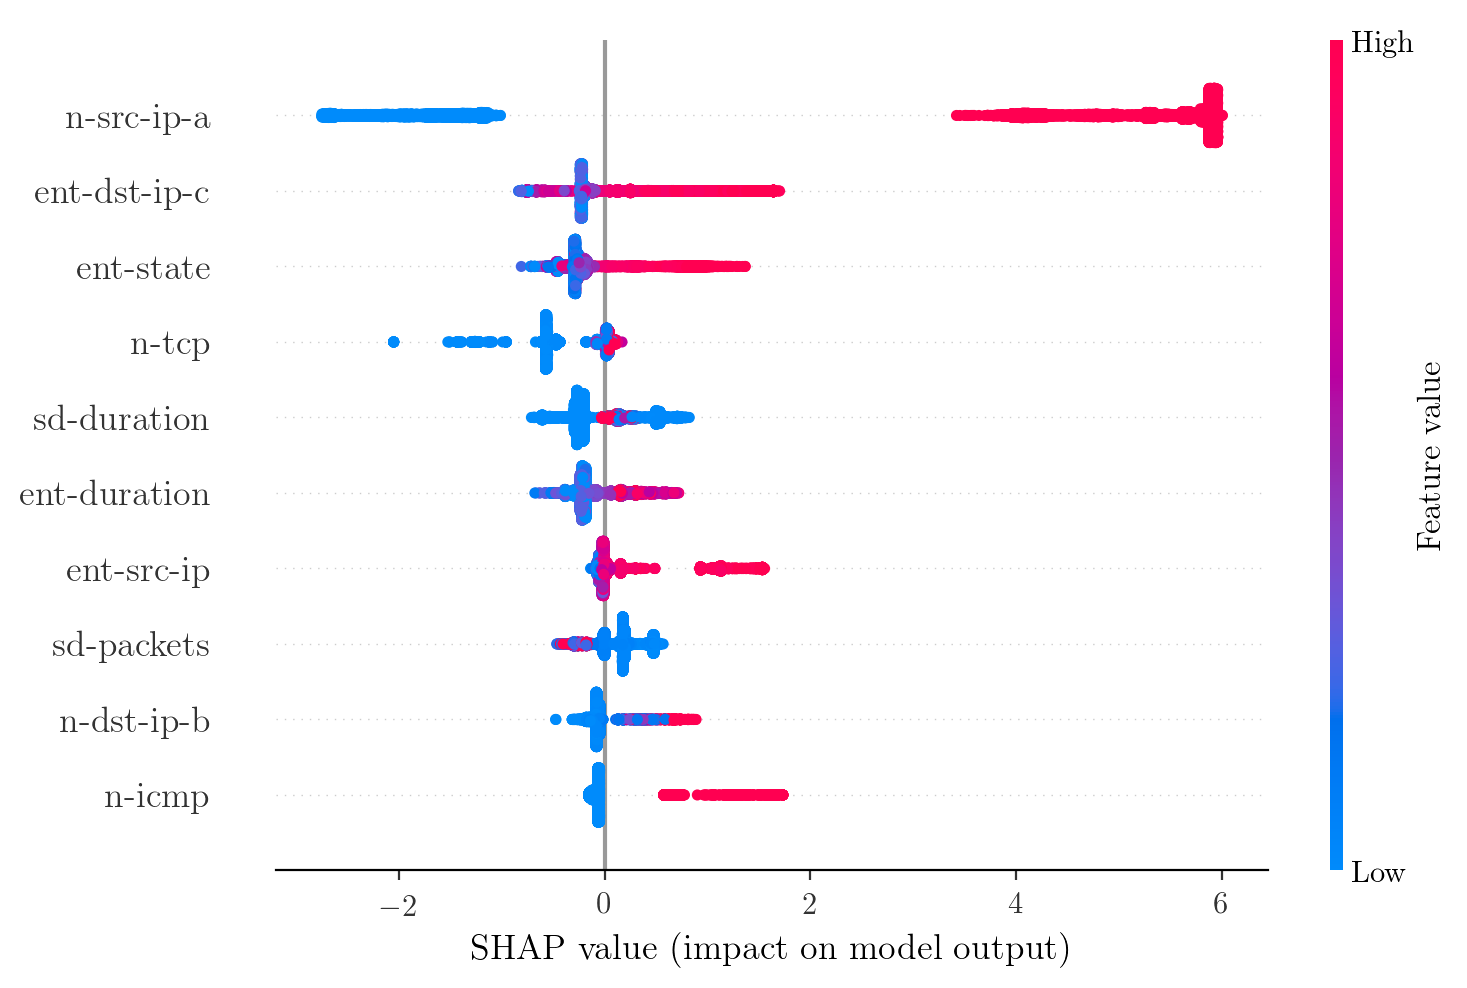

In [107]:
model = pickle.load(
    open(
        "../no_background_output/irc_10s/netflow_xgboost_fast_0steps_binary/model.pickle",
        "rb",
    )
)
x_te = pd.read_parquet(
    "../no_background_output/irc_10s/netflow_xgboost_fast_0steps_binary/x_te.parquet"
).rename(lambda x: x.replace('_', '-').replace('>=', '-gte-').replace('<', '-lt-').replace('srcip', 'src-ip').replace('s-','ent-'), axis=1)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_te)
shap.summary_plot(shap_values, x_te, plot_type="dot", max_display=10)

/data/saed/env/lib/python3.6/site-packages/shap/explainers/linear.py:49: UserWarning: The default value for feature_dependence has been changed to "independent"!
  warnings.warn('The default value for feature_dependence has been changed to "independent"!')


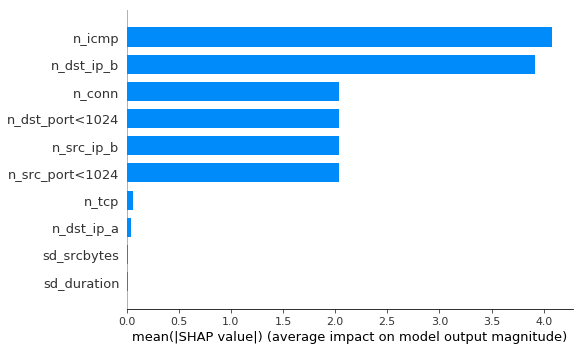

In [56]:
model = pickle.load(
    open(
        "../no_background_output/ddos_1s/netflow_logistic_regression_fast_0steps_binary/model.pickle",
        "rb",
    )
)
x_te = pd.read_parquet(
    "../no_background_output/ddos_1s/netflow_logistic_regression_fast_0steps_binary/x_te.parquet"
)
explainer = shap.LinearExplainer(model, x_te)
shap_values = explainer.shap_values(x_te)
shap.summary_plot(shap_values, x_te, plot_type="dot", max_display=10)

In [7]:
y_te = pd.read_parquet("../test/xx/netflow_random_forest_fast_0steps_binary/y_te_true.parquet")
y_pred = pd.read_parquet("../test/xx/netflow_random_forest_fast_0steps_binary/y_te_pred.parquet")

In [12]:
from sklearn.metrics import f1_score
f1_score(y_te.values.reshape(-1), y_pred.values[:,1].reshape(-1) >= 0.5)

0.9449848260835733

In [30]:
model = pickle.load(
    open("../test/xx_trans/netflow_random_forest_fast_1steps_transition/model.pickle", "rb")
)
x_te = pd.read_parquet(
    "../test/xx_trans/netflow_random_forest_fast_1steps_transition/x_te.parquet"
)

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_te)

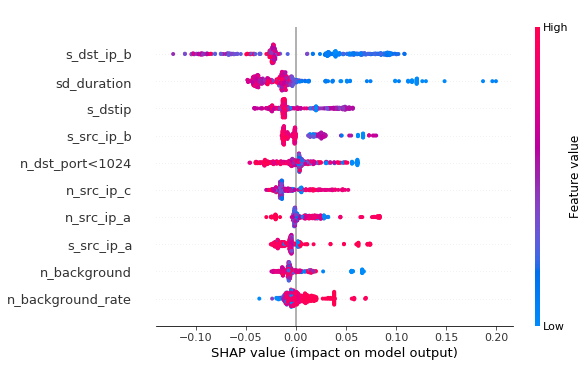

In [32]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values[0], x_te, plot_type="dot", max_display=10)

In [68]:
netflow = pd.read_parquet('../data/no_background/ddos_1s_netflow.parquet')
netflow.columns

Index(['m_duration', 'n_background', 'n_conn', 'n_dst_ip_a', 'n_dst_ip_b',
       'n_dst_ip_c', 'n_dst_ip_na', 'n_dst_port<1024', 'n_dst_port>=1024',
       'n_icmp', 'n_normal', 'n_src_ip_a', 'n_src_ip_b', 'n_src_ip_c',
       'n_src_ip_na', 'n_src_port<1024', 'n_src_port>=1024', 'n_tcp', 'n_udp',
       's_dst_ip_a', 's_dst_ip_b', 's_dst_ip_c', 's_dst_ip_d',
       's_dst_port<1024', 's_dst_port>=1024', 's_dstip', 's_duration',
       's_packets', 's_src_ip_a', 's_src_ip_b', 's_src_ip_c', 's_src_ip_d',
       's_src_port<1024', 's_src_port>=1024', 's_srcbytes', 's_srcip',
       's_state', 's_totbytes', 'sd_duration', 'sd_packets', 'sd_srcbytes',
       'sd_totbytes'],
      dtype='object')

In [60]:
pcap = pd.read_parquet('../data/no_background/ddos_1s_pcap.parquet')

In [67]:
print(list(enumerate(sorted(pcap.columns, reverse=True))))

[(0, 'n_udp'), (1, 'n_tcp'), (2, 'n_src_port>=1024'), (3, 'n_src_port<1024'), (4, 'n_src_ipclass_na'), (5, 'n_src_ipclass_c'), (6, 'n_src_ipclass_b'), (7, 'n_src_ipclass_a'), (8, 'n_packets'), (9, 'n_normal'), (10, 'n_icmp'), (11, 'n_dst_port>=1024'), (12, 'n_dst_port<1024'), (13, 'n_dst_ipclass_na'), (14, 'n_dst_ipclass_c'), (15, 'n_dst_ipclass_b'), (16, 'n_dst_ipclass_a'), (17, 'n_background'), (18, 'n_abnormal'), (19, 'ent_src_port>=1024'), (20, 'ent_src_port<1024'), (21, 'ent_src_port'), (22, 'ent_src_ip_na'), (23, 'ent_src_ip_c'), (24, 'ent_src_ip_b'), (25, 'ent_src_ip_a'), (26, 'ent_src_ip'), (27, 'ent_dst_port>=1024'), (28, 'ent_dst_port<1024'), (29, 'ent_dst_port'), (30, 'ent_dst_ip_na'), (31, 'ent_dst_ip_c'), (32, 'ent_dst_ip_b'), (33, 'ent_dst_ip_a'), (34, 'ent_dst_ip')]


In [62]:
len(pcap.columns)

35